# Graduate Rotaional Internship Program - The Sparks Foundation

## Data Science & Business Analytics 

#### By  K K THEJASKRISHNA

### TASK 1 - Prediction using Supervised ML

The task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



In [15]:
# importing all the required libraries

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#importing the data 

data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



### Plotting the dataset using scatter plot 


Text(0.5, 1.0, 'Hours vs percentage')

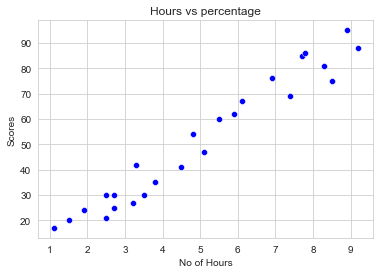

In [17]:
#plotting the datset

import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(x = data.Hours, y = data.Scores, color ='blue')
plt.xlabel('No of Hours')
plt.title('Hours vs percentage')

#### we can clearly see a positive linear relationship between Hours and Scores 

### Preparing the data 

Dividing the data into X, Y (in necessary format) to implement the Scikit- learn methods




In [18]:
X = np.array(data.drop('Scores',1))
Y = np.array(data.Scores)

print(X.shape,Y.shape)

(25, 1) (25,)


Now splitting the data into training and testing sets using train_test_split() built in method 

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)




### Training the Algoritham

As we have split our data into training and testing sets, let's train our algorithm 


In [20]:
#importing the LinearRegression method
from sklearn.linear_model import LinearRegression  

lreg = LinearRegression()   #creating an object of LinearRegression
lreg.fit(X_train, Y_train) 


LinearRegression()

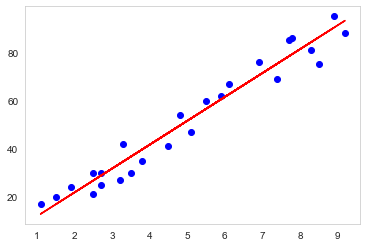

In [21]:
#plotting regression line
line = lreg.coef_* X + lreg.intercept_

#plotting X,Y datasets 
plt.scatter(X, Y, c = 'b')
plt.plot(X, line, c='r')
plt.grid()

### Making Predictions

Predicting the scores using X_test

In [28]:

Y_pred = lreg.predict(X_test)


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


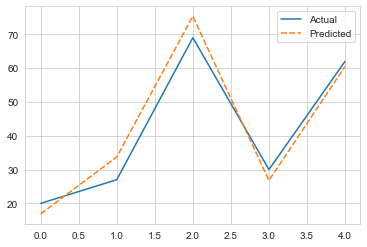

In [29]:
#creating dataframe to compare actual and predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  

sns.lineplot(data = df)  # line plot using seaborn to visualize data
df



###### Manually testing for our own data ( hours = 9.25)


In [31]:
hours = 9.25   # input data

print("No of Hours = {}".format(hours))

hours = np.array(9.25).reshape(-1,1) # reshaping into required format

own_pred = lreg.predict(hours) # predicting

print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

finally we are evaluating the performance of the algorithm.Here we are using mean squared error and root mean squared error for evaluation

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665
